In [3]:
%pip install wordcloud
%pip install seaborn
%pip install matplotlib
%pip install numpy
%pip install pandas

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.


In [4]:
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import string
import re
from collections import Counter

#đọc file
df = pd.read_csv("./dataset_en/Amazon_Product_Review_full_en_cleaned.csv")
# Xác định cột chứa nội dung review: ưu tiên 'review_body', sau đó 'review_headline'
if 'review_headline' in df.columns:
    review_col = 'review_headline'
elif 'review_body' in df.columns:
    review_col = 'review_body'
else:
    raise Exception("Không tìm thấy cột review (expected 'review_body', 'review_headline')")



In [5]:
print("=== Thông tin dataset ===")
df.info()

=== Thông tin dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30846 entries, 0 to 30845
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        30846 non-null  object
 1   customer_id        30846 non-null  int64 
 2   review_id          30846 non-null  object
 3   product_id         30846 non-null  object
 4   product_parent     30846 non-null  int64 
 5   product_title      30846 non-null  object
 6   product_category   30846 non-null  object
 7   star_rating        30846 non-null  int64 
 8   helpful_votes      30846 non-null  int64 
 9   total_votes        30846 non-null  int64 
 10  vine               30846 non-null  object
 11  verified_purchase  30846 non-null  object
 12  review_headline    30829 non-null  object
 13  review_body        30815 non-null  object
 14  review_date        30846 non-null  object
 15  sentiment          30846 non-null  int64 
dtypes: int64(6), o

In [6]:
#Kiểm tra dữ liệu trùng lặp
duplicates = df.duplicated().sum()
print(f"\nSố dòng dữ liệu trùng lặp: {duplicates}")


Số dòng dữ liệu trùng lặp: 0


In [7]:
# Kiểm tra số lượng giá trị null theo từng cột
print("\nSố lượng giá trị null theo cột:")
print(df.isnull().sum())


Số lượng giá trị null theo cột:
marketplace           0
customer_id           0
review_id             0
product_id            0
product_parent        0
product_title         0
product_category      0
star_rating           0
helpful_votes         0
total_votes           0
vine                  0
verified_purchase     0
review_headline      17
review_body          31
review_date           0
sentiment             0
dtype: int64


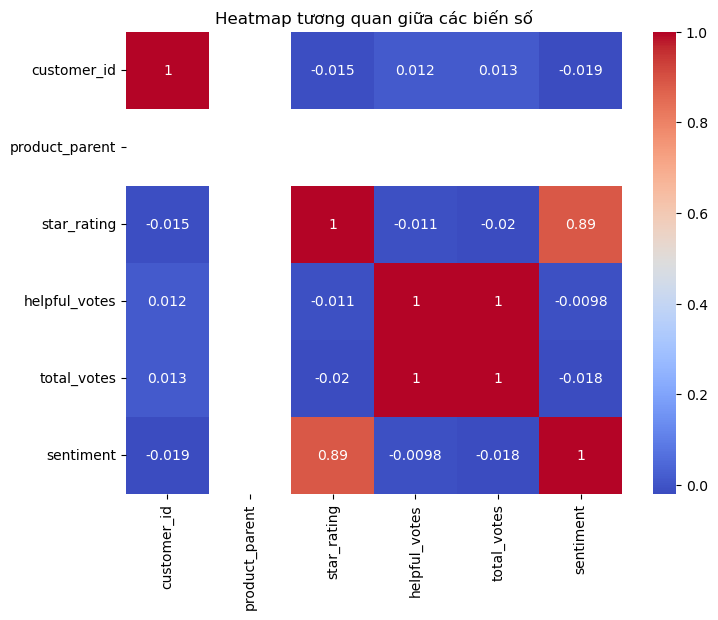

In [8]:
# 4. Vẽ heatmap mối tương quan giữa các cột số
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if numeric_cols:
    plt.figure(figsize=(8,6))
    corr = df[numeric_cols].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title("Heatmap tương quan giữa các biến số")
    plt.show()

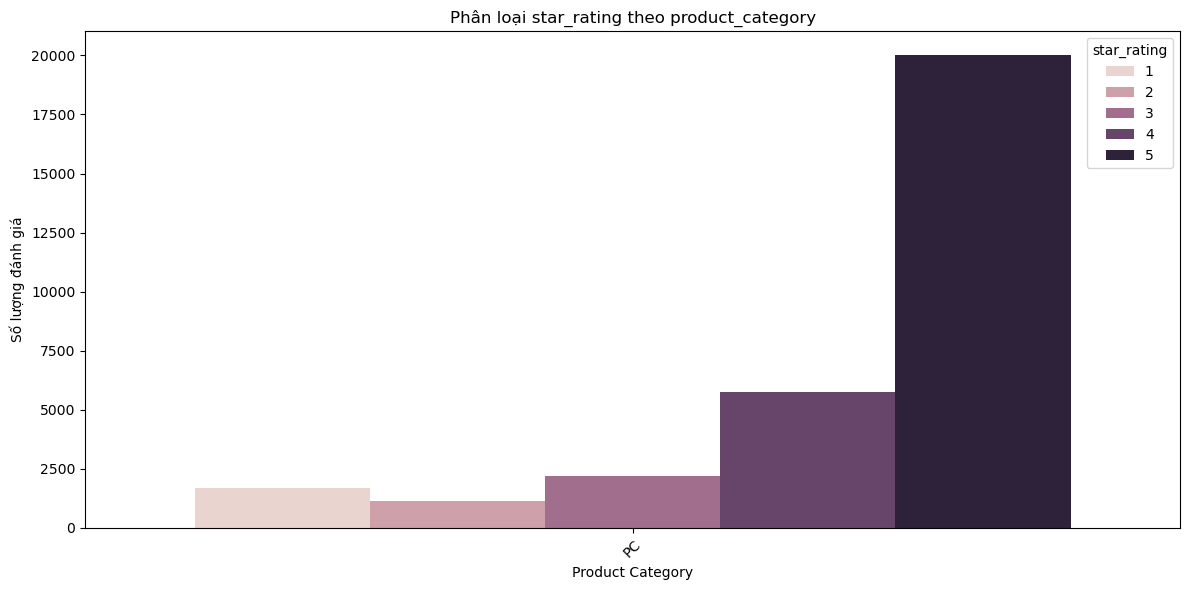

In [9]:
# 1. Phân loại star_rating theo product_category
# -------------------------------

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='product_category', hue='star_rating')
plt.title('Phân loại star_rating theo product_category')
plt.xlabel('Product Category')
plt.ylabel('Số lượng đánh giá')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Thinh.LAPTOP-GCU8T0AJ\AppData\Local\Temp\ipykernel_21932\2769464641.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='star_rating', data=df, palette='viridis')


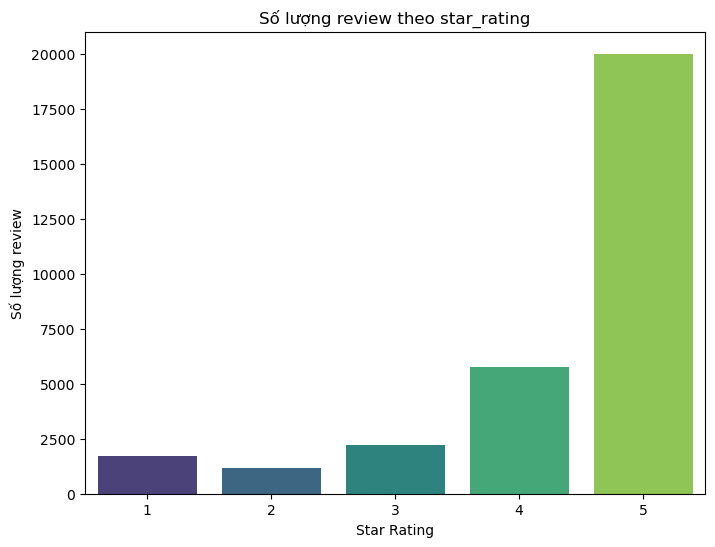

In [10]:
# 1. Phân tích mối quan hệ giữa star_rating và review_body
# Biểu đồ đếm số lượng review theo từng star_rating
plt.figure(figsize=(8, 6))
sns.countplot(x='star_rating', data=df, palette='viridis')
plt.title('Số lượng review theo star_rating')
plt.xlabel('Star Rating')
plt.ylabel('Số lượng review')
plt.show()


Mô tả của review_length:
count    30846.000000
mean         4.308695
std          3.576379
min          1.000000
25%          2.000000
50%          2.000000
75%          6.000000
max         26.000000
Name: review_length, dtype: float64


C:\Users\Thinh.LAPTOP-GCU8T0AJ\AppData\Local\Temp\ipykernel_21932\2431275240.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='star_rating', y='review_length', data=avg_review_length, palette="magma")


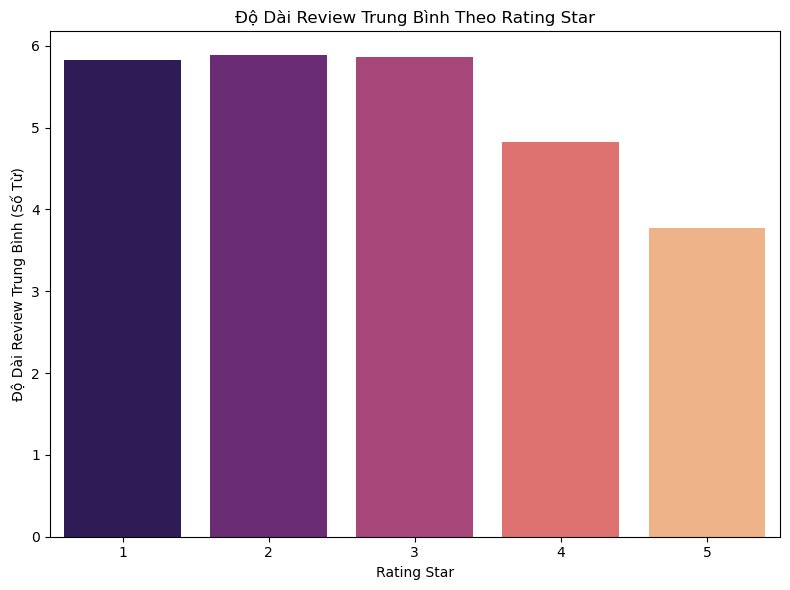

In [11]:
# Tạo cột review_length: đếm số từ trong nội dung review
df['review_length'] = df[review_col].apply(lambda x: len(str(x).split()))
print("\nMô tả của review_length:")
print(df['review_length'].describe())
# 3. Barplot: Độ dài review trung bình theo Rating Star
avg_review_length = df.groupby('star_rating')['review_length'].mean().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='star_rating', y='review_length', data=avg_review_length, palette="magma")
plt.title("Độ Dài Review Trung Bình Theo Rating Star")
plt.xlabel("Rating Star")
plt.ylabel("Độ Dài Review Trung Bình (Số Từ)")
plt.tight_layout()
plt.show()

C:\Users\Thinh.LAPTOP-GCU8T0AJ\AppData\Local\Temp\ipykernel_21932\3387660300.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), ax=axes[i], palette="cool")
C:\Users\Thinh.LAPTOP-GCU8T0AJ\AppData\Local\Temp\ipykernel_21932\3387660300.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), ax=axes[i], palette="cool")
C:\Users\Thinh.LAPTOP-GCU8T0AJ\AppData\Local\Temp\ipykernel_21932\3387660300.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), ax=axes[

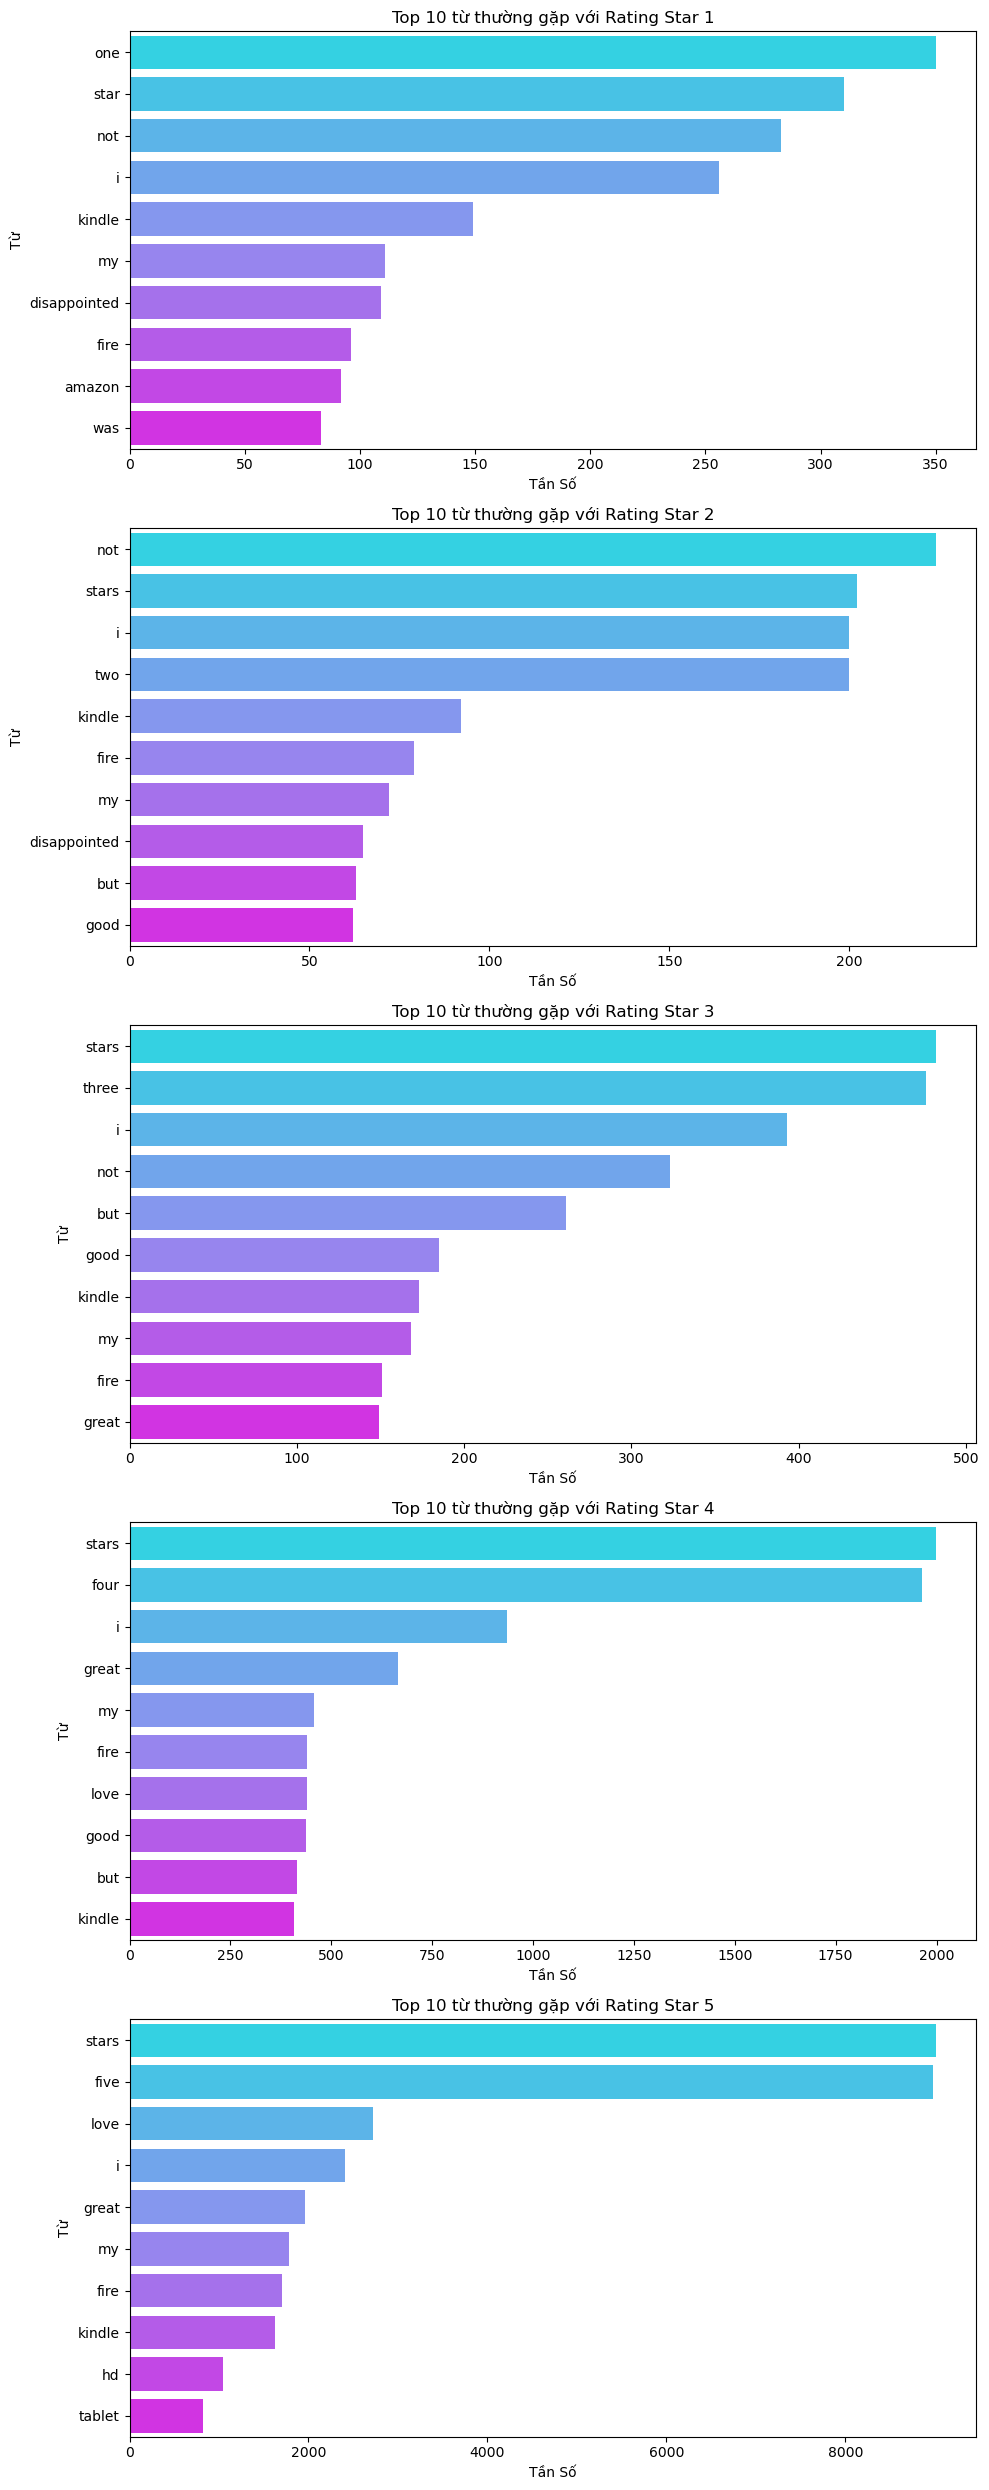

In [12]:
# Danh sách stopwords cơ bản (bạn có thể mở rộng danh sách này nếu cần)
default_stopwords = set(["the", "and", "a", "an", "in", "of", "to", "is", "it", "that", "for", "with", "on", "this"])

# Hàm tokenize: chuyển văn bản về chữ thường, loại bỏ dấu câu và stopwords
def tokenize(text):
    text = str(text).lower()  # chuyển về chữ thường
    text = re.sub(f"[{re.escape(string.punctuation)}]", " ", text)  # loại bỏ dấu câu
    tokens = text.split()
    tokens = [t for t in tokens if t not in default_stopwords]  # loại bỏ stopwords
    return tokens

# Lấy danh sách các rating có trong dữ liệu, giả sử cột đánh giá là 'star_rating'
ratings = sorted(df['star_rating'].unique())
word_freq_dict = {}

for r in ratings:
    # Lấy các review tương ứng với rating r
    texts = df[df['star_rating'] == r][review_col].dropna().tolist()
    all_tokens = []
    for text in texts:
        all_tokens.extend(tokenize(text))
    # Đếm tần suất từ
    counter = Counter(all_tokens)
    common_words = counter.most_common(10)  # Lấy 10 từ xuất hiện nhiều nhất
    word_freq_dict[r] = common_words

# Vẽ biểu đồ cho từng mức rating
num_ratings = len(ratings)
fig, axes = plt.subplots(num_ratings, 1, figsize=(10, 5 * num_ratings))
if num_ratings == 1:
    axes = [axes]

for i, r in enumerate(ratings):
    if word_freq_dict[r]:
        words, counts = zip(*word_freq_dict[r])
    else:
        words, counts = ([], [])
    sns.barplot(x=list(counts), y=list(words), ax=axes[i], palette="cool")
    axes[i].set_title(f"Top 10 từ thường gặp với Rating Star {r}")
    axes[i].set_xlabel("Tần Số")
    axes[i].set_ylabel("Từ")

plt.tight_layout()
plt.show()